# Introduction

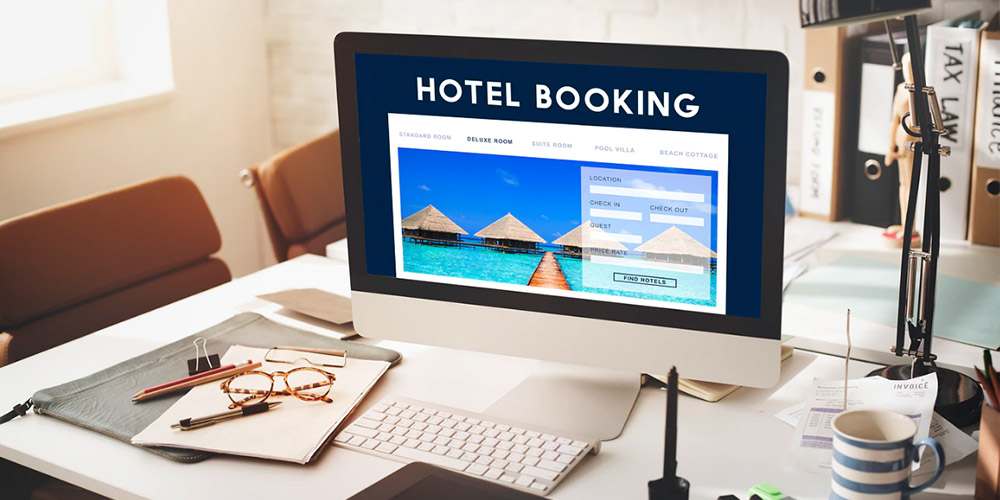

<b>Context</b>
This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.

<b>Content</b>
Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted.
Four Columns, 'name', 'email', 'phone number' and 'credit_card' have been artificially created and added to the dataset.

<b>Acknowledgements</b>
The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

The dataset is available from [kaggle](https://www.kaggle.com/mojtaba142/hotel-booking)

In [1]:
#Importing necessary packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading dataset
hotel=pd.read_csv('D:\\Projects\\hotel_booking.csv')
pd.set_option("display.max_columns", None)
hotel.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [3]:
hotel.shape

(119390, 36)

In [4]:
#Getting dataset info
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
#Getting Null Values
hotel.isnull().sum()*100/len(hotel)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [6]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### Filling Null Values

In [7]:
#Getting country info
hotel.country.value_counts().head(5)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

In [8]:
#We can see that there is high number of people from Portugal(PRT) so we will it with PRT
hotel.country.fillna('PRT',inplace=True)

In [9]:
#Will fill children column with 0 value 
hotel.children.fillna(0,inplace=True)

In [10]:
#Will fill agent value with Null values
hotel.agent.fillna(0,inplace=True)

In [11]:
#Drop company value from dataset as there is 94% of null values also the email , phone number and credit card info is not required as they wont give much of a info
hotel.drop(['company','email','phone-number','credit_card'],inplace=True,axis=1)
hotel['arrival_date_month']=hotel['arrival_date_month'].apply(lambda x:x[0:3])
hotel.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name
0,Resort Hotel,0,342,2015,Jul,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes
1,Resort Hotel,0,737,2015,Jul,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker
2,Resort Hotel,0,7,2015,Jul,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker
3,Resort Hotel,0,13,2015,Jul,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray


#### Now we have removed all the Null Values now we can start with analysis

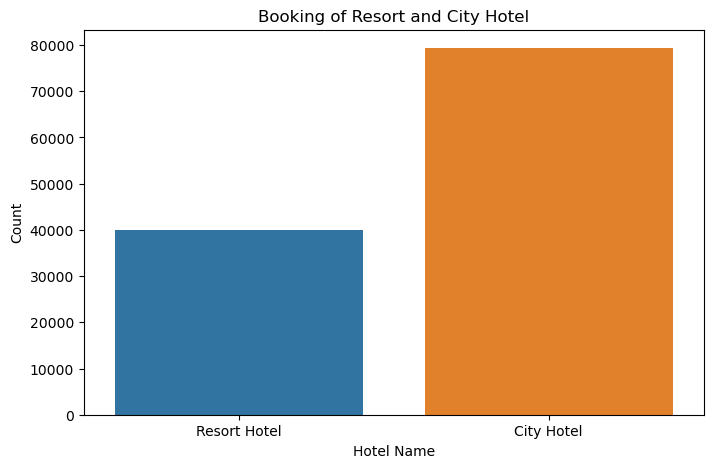

In [12]:
# Now we will check how the booking count is distributed between resort and hotel 
plt.figure(figsize=(8,5))
sns.countplot(hotel['hotel'])
plt.xlabel('Hotel Name')
plt.ylabel('Count')
plt.title('Booking of Resort and City Hotel')
plt.show()

#### We can see that City Hotel is booked for approx twice the amount Resort Hotel is booked.

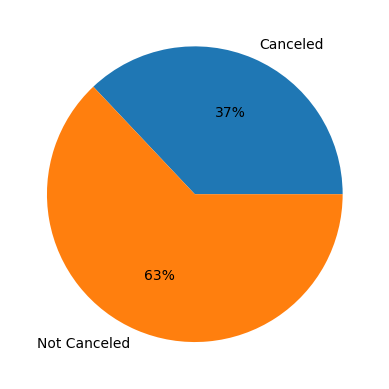

In [13]:
#Calculation of canceled and not canceled bookings
data=[hotel.is_canceled.sum(),len(hotel)-hotel.is_canceled.sum()]
labels=['Canceled','Not Canceled']
plt.pie(data,labels=labels,autopct='%.0f%%')
plt.show()

#### Almost 37% of booking done is canceled .

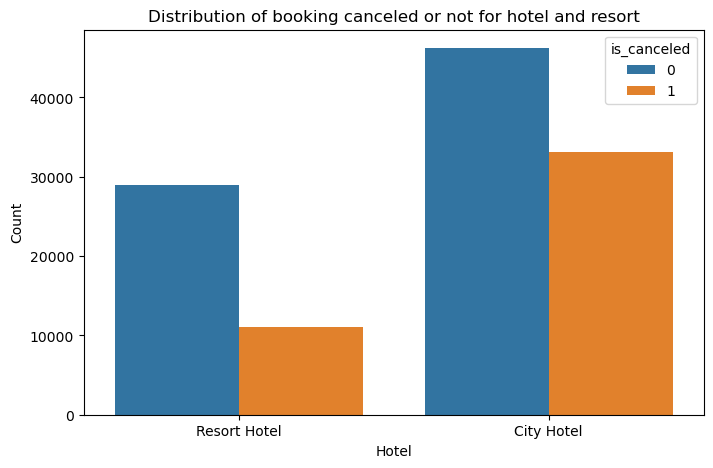

In [14]:
#Distribution of count of canceled and not caneled
plt.figure(figsize=(8,5))
sns.countplot(data=hotel,x='hotel',hue='is_canceled')
plt.xlabel("Hotel")
plt.ylabel("Count")
plt.title("Distribution of booking canceled or not for hotel and resort")
plt.show()

#### For Hotel we can see there is a huge number of cancelation even though there is high booking but for Resort the number of cancelation is comparatively less then booking not canceled , maybe due to fact that people usually book Resort if they are in vacation but for business visits and all one will book hotel and there is chance it will be canceled at many times. 

In [15]:
# We will split data in 2 one for resort one for hotel so that it is easy to understand the trends seperately
city_hotel= hotel[hotel['hotel']=='City Hotel']
resort_hotel= hotel[hotel['hotel']=='Resort Hotel']

Average Lead time for Hotel is :  109 days
Average Lead time for Resort is :  92 days
Maximum Lead time for Hotel is :  629 days
Maximum Lead time for Resort is :  737 days


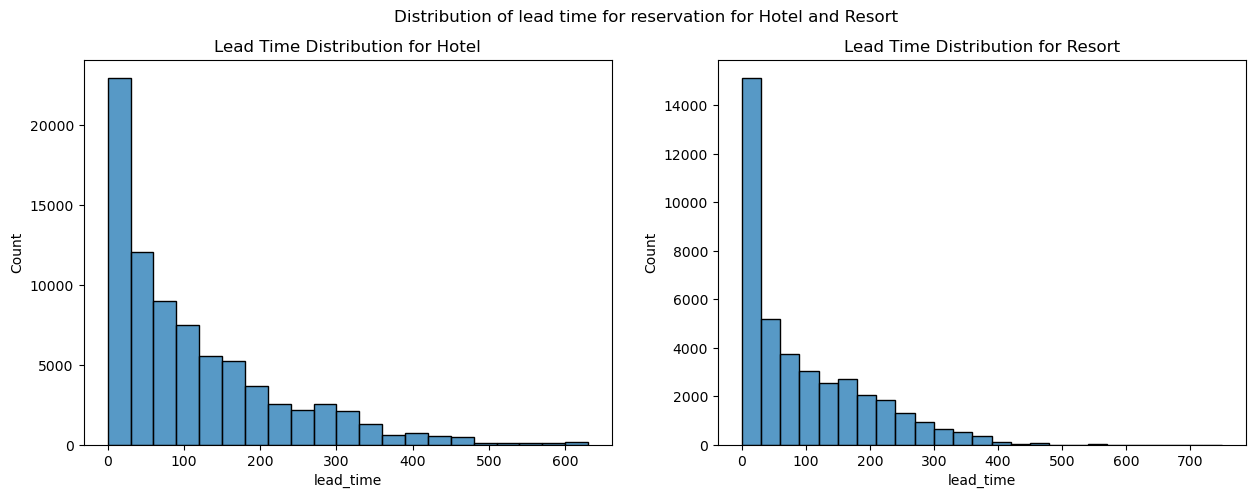

In [16]:
#see the distribution of lead time
print("Average Lead time for Hotel is : ",int(city_hotel['lead_time'].mean()),"days")
print("Average Lead time for Resort is : ",int(resort_hotel['lead_time'].mean()),"days")
print("Maximum Lead time for Hotel is : ",int(city_hotel['lead_time'].max()),"days")
print("Maximum Lead time for Resort is : ",int(resort_hotel['lead_time'].max()),"days")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribution of lead time for reservation for Hotel and Resort')
sns.histplot(ax=axes[0],data=city_hotel, x="lead_time",binwidth=30)
axes[0].set_title('Lead Time Distribution for Hotel')
sns.histplot(ax=axes[1],data=resort_hotel, x="lead_time",binwidth=30)
axes[1].set_title('Lead Time Distribution for Resort')
plt.show()

#### For Hotel we can see that the Average Lead Time is slightly higher than Resort . Also we can see that in case of Hotel booking maximum lead time is 629 days but for resort it is 737 days. We can see that the lead time plot of both of them is highly skewed  

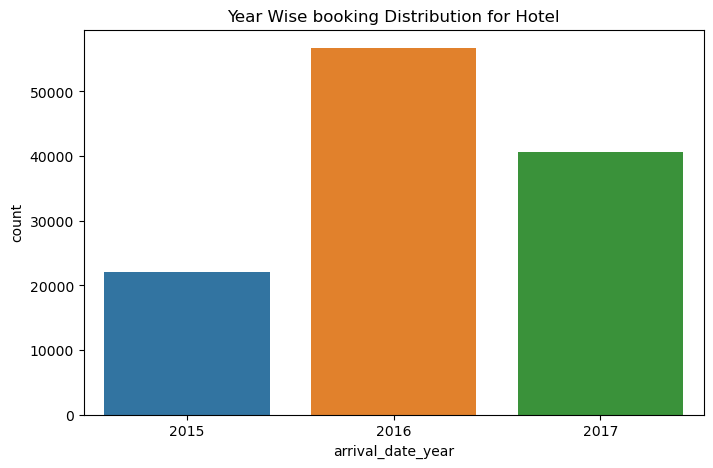

In [17]:
#Check year wise distribution for Hotel and Resort
plt.figure(figsize=(8,5))
sns.countplot(data=hotel, x="arrival_date_year")
plt.title('Year Wise booking Distribution for Hotel')
plt.show()

#### We can see that from 2015 to 2016 there is huge increase in number of bookings and also in 2017 the data is till for August so we can say that it looks promising as well.

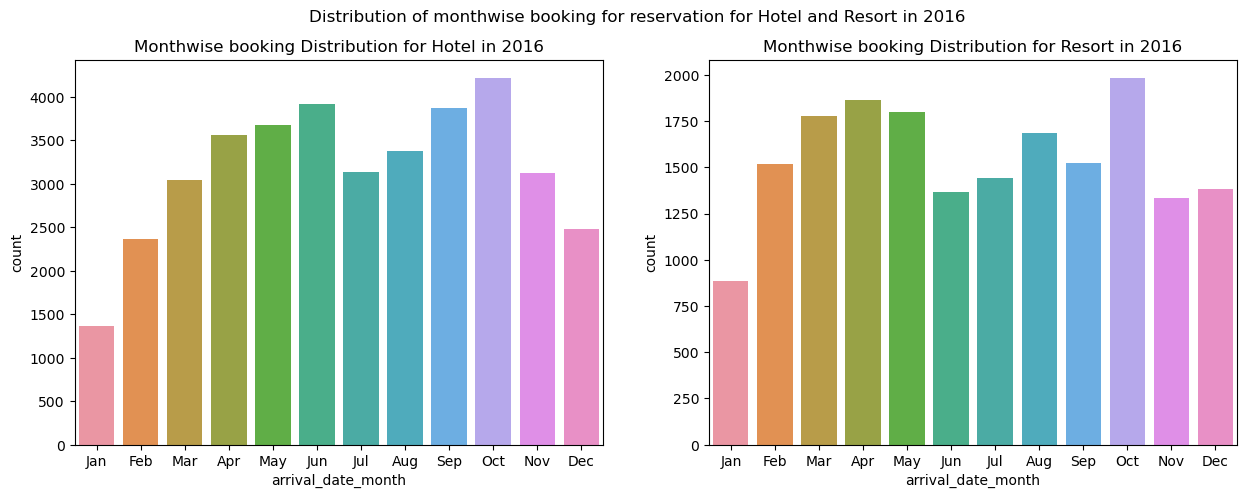

In [18]:
# For checking the distribution of booking we will take only the year 2016 in consideration for both hotel and resort
city_2016=city_hotel[city_hotel['arrival_date_year']==2016]
resort_2016=resort_hotel[resort_hotel['arrival_date_year']==2016]
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribution of monthwise booking for reservation for Hotel and Resort in 2016')
sns.countplot(ax=axes[0],data=city_2016, x="arrival_date_month")
axes[0].set_title('Monthwise booking Distribution for Hotel in 2016')
sns.countplot(ax=axes[1],data=resort_2016, x="arrival_date_month")
axes[1].set_title('Monthwise booking Distribution for Resort in 2016')
plt.show()

#### We can see that in both the cases October shows higest resrvation being done and lowest in January

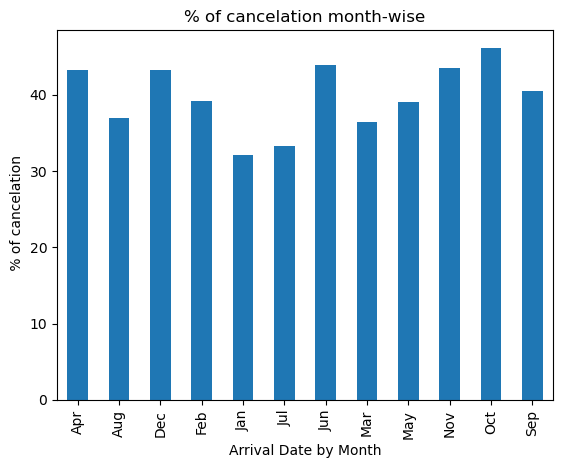

In [19]:
#Cancelation %
cancel_2016=city_2016.groupby('arrival_date_month').sum()['is_canceled']*100/city_2016.groupby('arrival_date_month').count()['is_canceled']
cancel_2016.plot(kind='bar')
plt.xlabel('Arrival Date by Month')
plt.ylabel(' % of cancelation')
plt.title('% of cancelation month-wise')
plt.show()

#### We can see that the month of October has Highest cancelation rate and January has the lowest

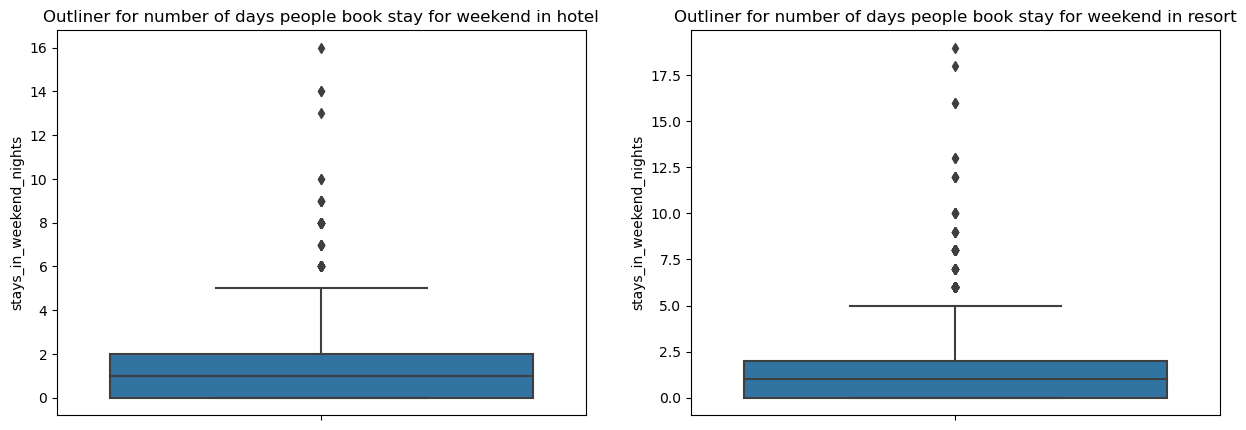

In [20]:
#Check data for weekend stays
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(ax=axes[0],data=city_hotel,y=city_hotel["stays_in_weekend_nights"])
axes[0].set_title('Outliner for number of days people book stay for weekend in hotel')
sns.boxplot(ax=axes[1],data=resort_hotel,y=resort_hotel["stays_in_weekend_nights"])
axes[1].set_title('Outliner for number of days people book stay for weekend in resort')
plt.show()

#### We can see that plot for hotel is almost similar compared to that of resort . Although they have almost similar number of outliners but the maximum outliner in case of resort stands at around 19 days while for hotel it is around 16 days.

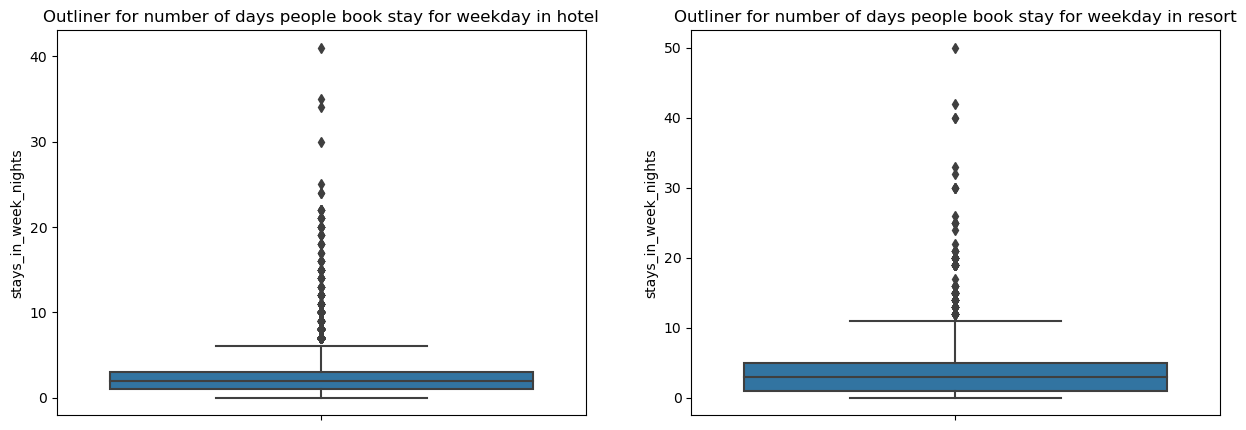

In [21]:
#Check data for weekday stays
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(ax=axes[0],data=city_hotel,y=city_hotel["stays_in_week_nights"])
axes[0].set_title('Outliner for number of days people book stay for weekday in hotel')
sns.boxplot(ax=axes[1],data=resort_hotel,y=resort_hotel["stays_in_week_nights"])
axes[1].set_title('Outliner for number of days people book stay for weekday in resort')
plt.show()

#### Here also we can see the same type of nature as we saw for stay in weekend . <br>
#### Also we can say people staying in Resorts tend to stay for longer durations

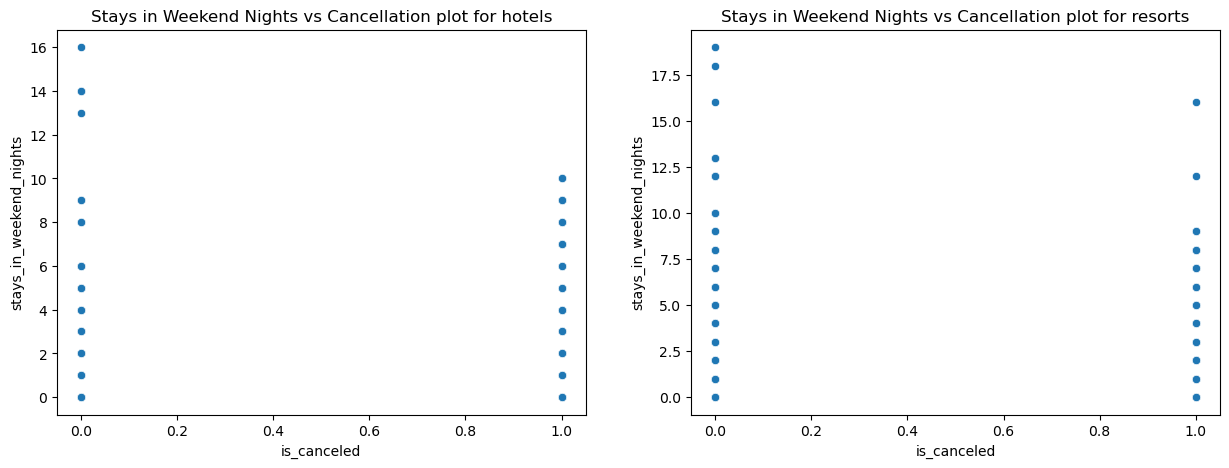

In [22]:
#Weekend stay correalation with cancellation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(ax=axes[0],data=city_hotel, x="is_canceled", y="stays_in_weekend_nights")
axes[0].set_title('Stays in Weekend Nights vs Cancellation plot for hotels')
sns.scatterplot(ax=axes[1],data=resort_hotel, x="is_canceled", y="stays_in_weekend_nights")
axes[1].set_title('Stays in Weekend Nights vs Cancellation plot for resorts')
plt.show()

#### Here in x axis 1 means canceled and 0 means not canceled .
#### We can see that in case of Hotels usually people who book for (0-10) days are at risk to cancel the booking
#### While in case of resorts we can say that it is about (0-16) days .
#### If a person books more then 10 weekend days incase of hotel and 16 weekend days in case for resorts they are less likely to cancel

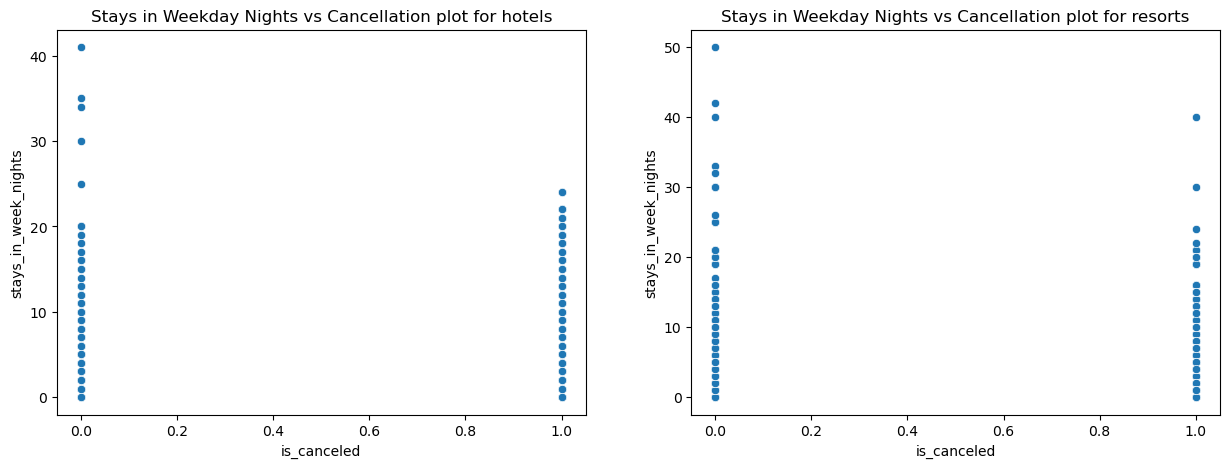

In [23]:
#Weekday stay correalation with cancellation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(ax=axes[0],data=city_hotel, x="is_canceled", y="stays_in_week_nights")
axes[0].set_title('Stays in Weekday Nights vs Cancellation plot for hotels')
sns.scatterplot(ax=axes[1],data=resort_hotel, x="is_canceled", y="stays_in_week_nights")
axes[1].set_title('Stays in Weekday Nights vs Cancellation plot for resorts')
plt.show()

#### Here we can say that if a person book for (0-25) days in case of hotels and (0-40)days in case of resort they are at risk of cancelling the booking

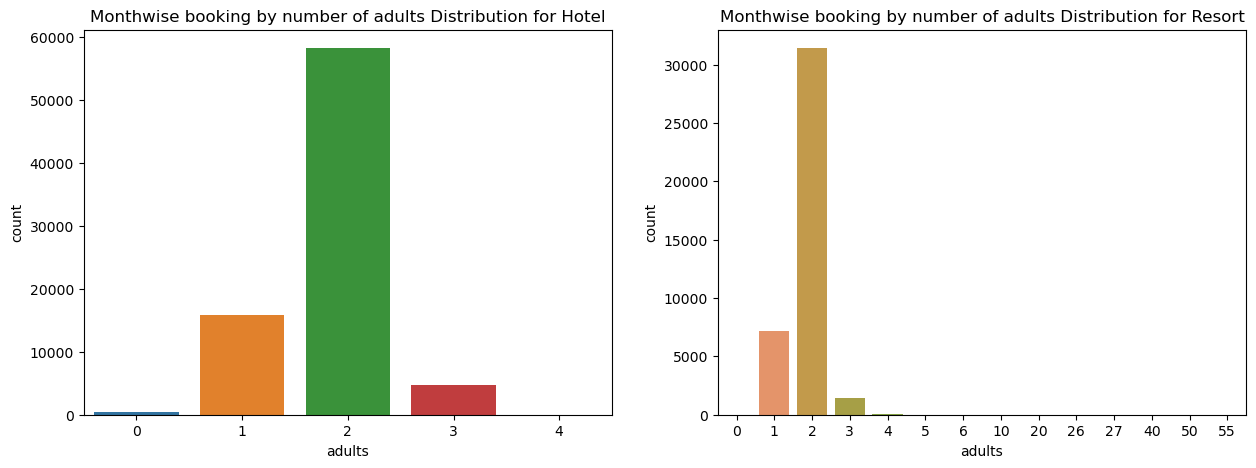

In [24]:
# Check how the booking count is distributed between resort and hotel for adults 
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(ax=axes[0],data=city_hotel, x="adults")
axes[0].set_title('Monthwise booking by number of adults Distribution for Hotel')
sns.countplot(ax=axes[1],data=resort_hotel, x="adults")
axes[1].set_title('Monthwise booking by number of adults Distribution for Resort')
plt.show()

#### In both the the hotels the maximum occurance is of 2 adults booking a room 
#### Also resort we can see is sometimes booked bulk as we can see some datas >10 which means it can be done by a group.

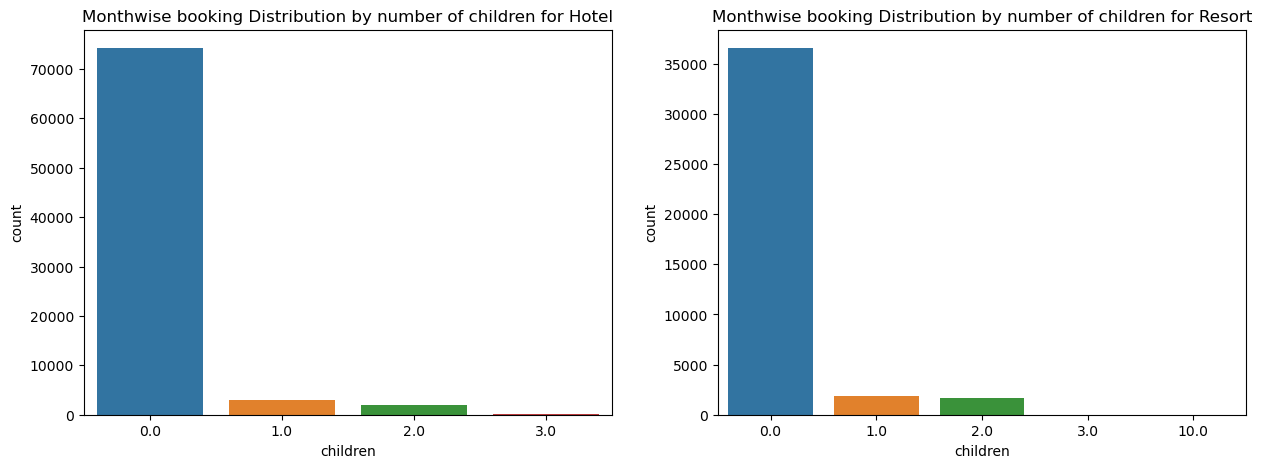

In [25]:
# Check how the booking count is distributed between resort and hotel for adults 
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(ax=axes[0],data=city_hotel, x="children")
axes[0].set_title('Monthwise booking Distribution by number of children for Hotel')
sns.countplot(ax=axes[1],data=resort_hotel, x="children")
axes[1].set_title('Monthwise booking Distribution by number of children for Resort')
plt.show()

#### In both the the hotels the maximum occurance is of 0 Children booking a room 

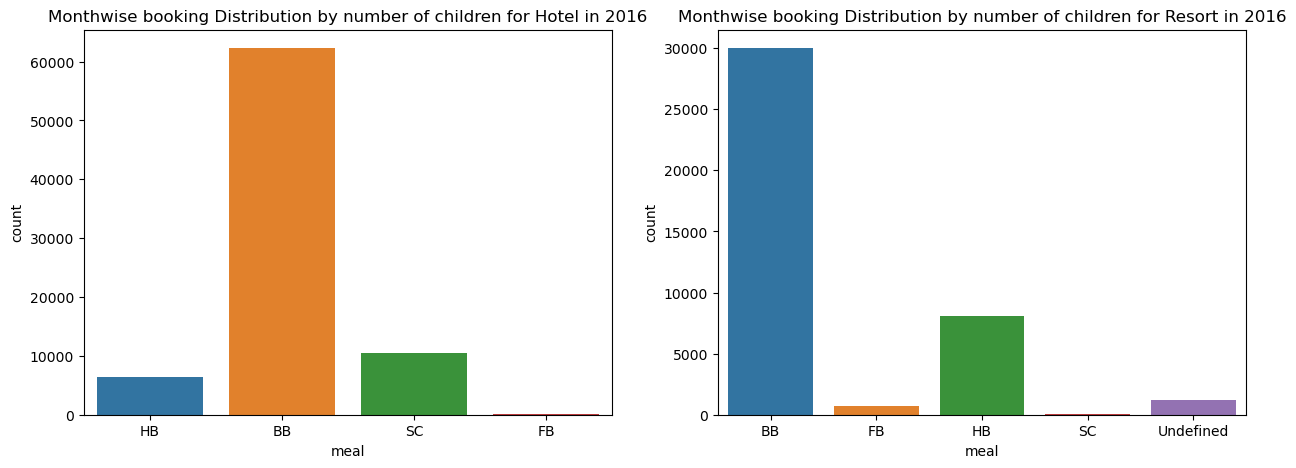

In [26]:
# Check how the meal is distributed between resort and hotel 
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(ax=axes[0],data=city_hotel, x="meal")
axes[0].set_title('Monthwise booking Distribution by number of children for Hotel in 2016')
sns.countplot(ax=axes[1],data=resort_hotel, x="meal")
axes[1].set_title('Monthwise booking Distribution by number of children for Resort in 2016')
plt.show()

#### In both the case Bed & Breakfast is the highest ordered but in case of Resort we can see that there is a huge request for half board and full board compared to Hotel. In Hotel many are booking it without any meals which is very less in case of Resort.

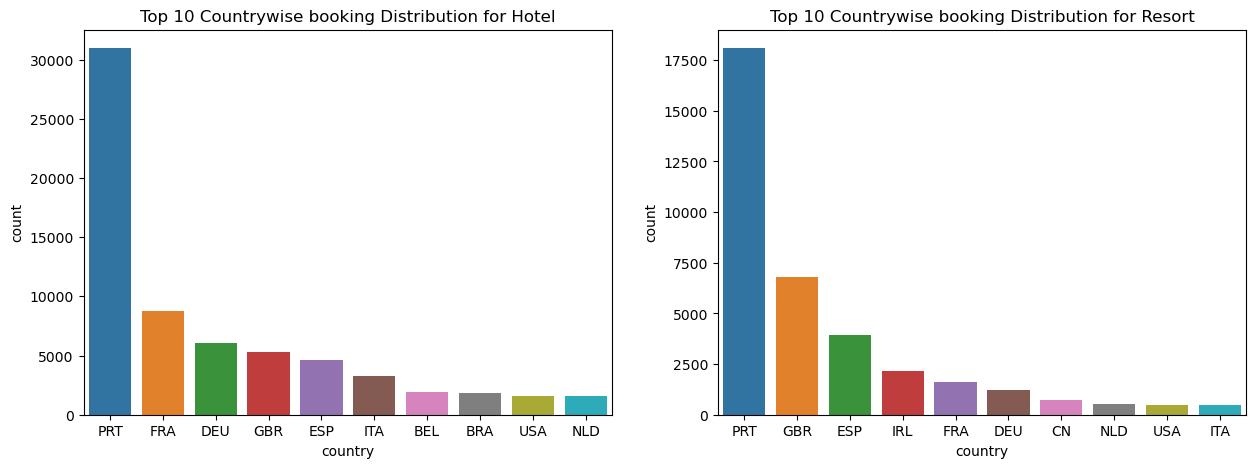

In [27]:
# Booking based on countries
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(ax=axes[0],data=city_hotel, x="country",order=city_hotel.country.value_counts().iloc[:10].index)
axes[0].set_title('Top 10 Countrywise booking Distribution for Hotel')
sns.countplot(ax=axes[1],data=resort_hotel, x="country",order=resort_hotel.country.value_counts().iloc[:10].index)
axes[1].set_title('Top 10 Countrywise booking Distribution for Resort')
plt.show()

#### For both the hotels the highest number of booking is from Portugal which is understandable as the hotels are located in Portugal. 
#### However the top 10 is distributed after that as we can see Great Britain is second highest in Resort but 4th in Hotel.

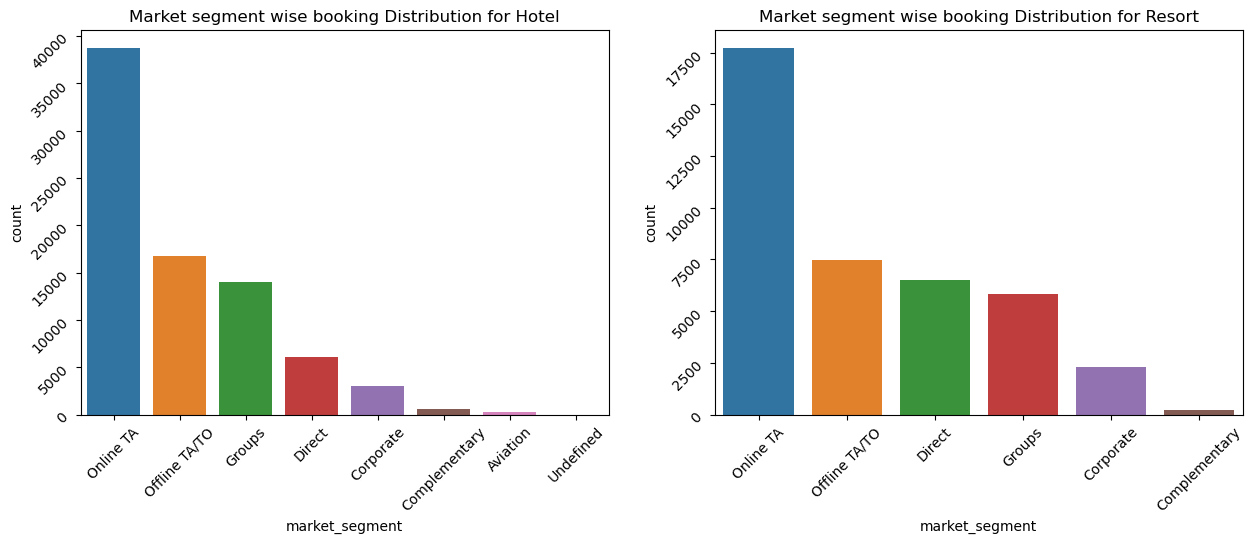

In [28]:
#Booking based on market segment
# Booking based on countries
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(ax=axes[0],data=city_hotel, x="market_segment",order=city_hotel.market_segment.value_counts().index)
axes[0].set_title('Market segment wise booking Distribution for Hotel')
axes[0].tick_params(labelrotation=45)
sns.countplot(ax=axes[1],data=resort_hotel, x="market_segment",order=resort_hotel.market_segment.value_counts().index)
axes[1].set_title('Market segment wise booking Distribution for Resort')
axes[1].tick_params(labelrotation=45)
plt.show()

#### For both the maximum booking is done via online Travel Agents as this is way convenient and faster.

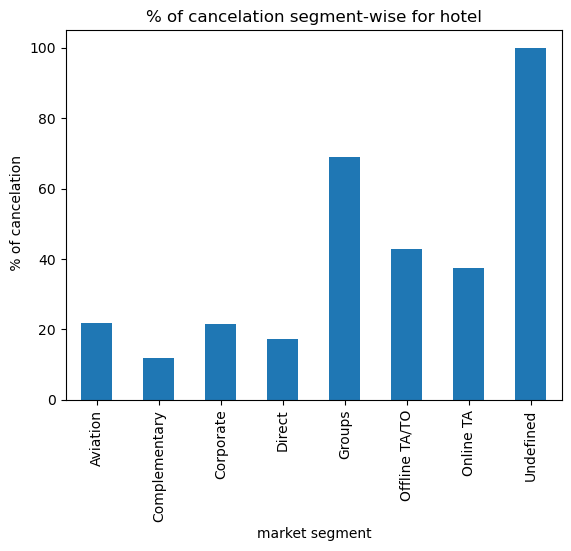

In [29]:
market_hotel=city_hotel.groupby('market_segment').sum()['is_canceled']*100/city_hotel.groupby('market_segment').count()['is_canceled']
market_hotel.plot(kind='bar')
plt.xlabel('market segment')
plt.ylabel(' % of cancelation')
plt.title('% of cancelation segment-wise for hotel')
plt.show()

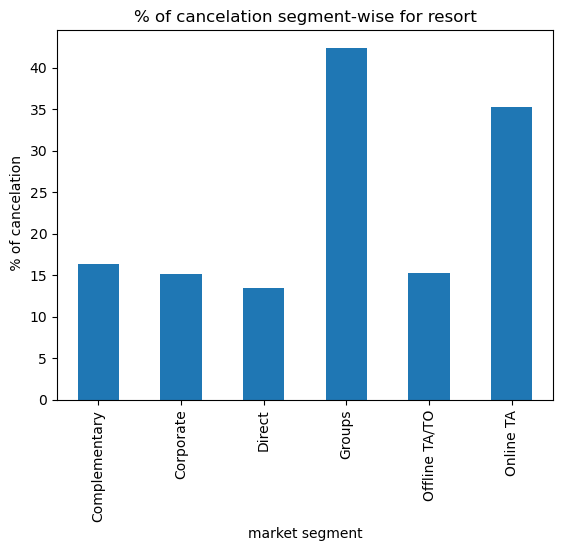

In [30]:
market_resort=resort_hotel.groupby('market_segment').sum()['is_canceled']*100/resort_hotel.groupby('market_segment').count()['is_canceled']
market_resort.plot(kind='bar')
plt.xlabel('market segment')
plt.ylabel(' % of cancelation')
plt.title('% of cancelation segment-wise for resort')
plt.show()

#### In both the cases people booking in groups are highly probable to cancel booking among all others

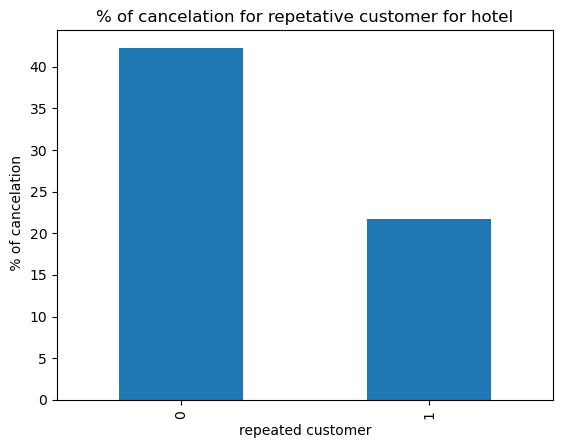

In [31]:
#Plot is_repeated_guest vs cancellation
repeat_hotel=city_hotel.groupby('is_repeated_guest').sum()['is_canceled']*100/city_hotel.groupby('is_repeated_guest').count()['is_canceled']
repeat_hotel.plot(kind='bar')
plt.xlabel('repeated customer')
plt.ylabel(' % of cancelation')
plt.title('% of cancelation for repetative customer for hotel')
plt.show()

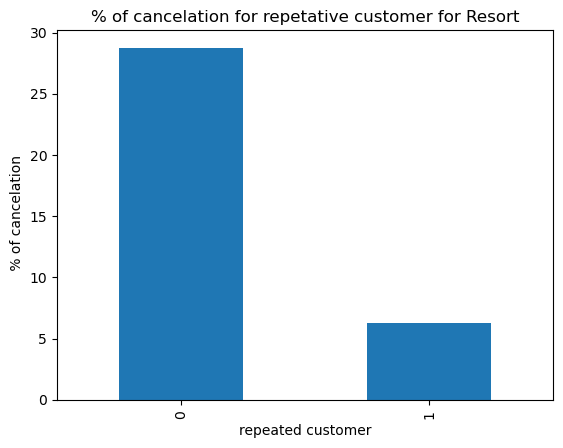

In [32]:
repeat_resort=resort_hotel.groupby('is_repeated_guest').sum()['is_canceled']*100/resort_hotel.groupby('is_repeated_guest').count()['is_canceled']
repeat_resort.plot(kind='bar')
plt.xlabel('repeated customer')
plt.ylabel(' % of cancelation')
plt.title('% of cancelation for repetative customer for Resort')
plt.show()

#### If person is repetead then the chances of canceling booking is very less compared to newcomer in both the hotels

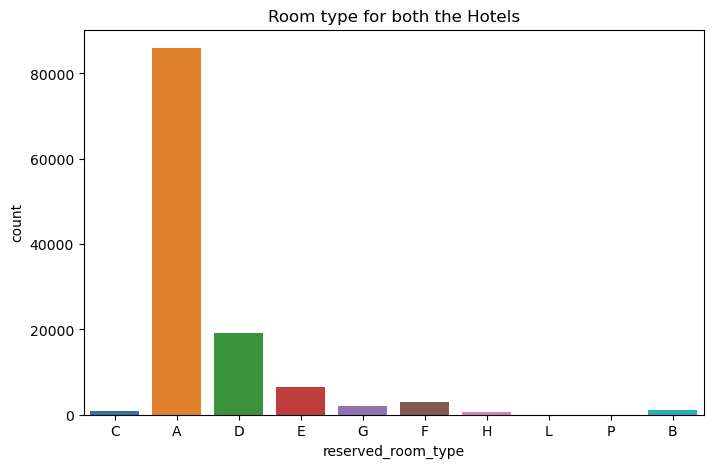

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(data=hotel, x="reserved_room_type")
plt.title('Room type for both the Hotels')
plt.show()

#### Maximum number of people books room type A

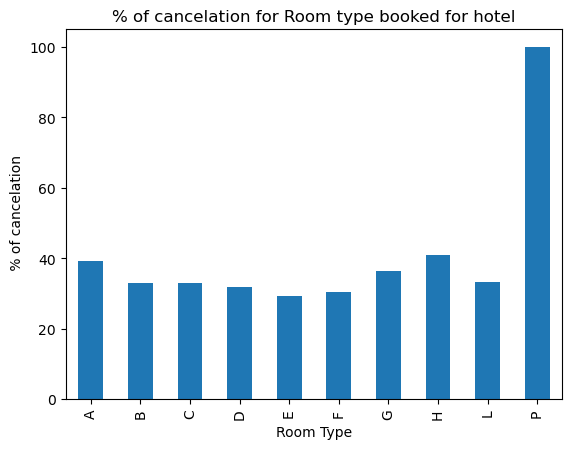

In [34]:
#Plot is_repeated_guest vs cancellation
room_type_hotel=hotel.groupby('reserved_room_type').sum()['is_canceled']*100/hotel.groupby('reserved_room_type').count()['is_canceled']
room_type_hotel.plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel(' % of cancelation')
plt.title('% of cancelation for Room type booked for hotel')
plt.show()

#### We can see that whoever is booking Room Type P is canceling everytime

In [35]:
#Checking relation between assigned and reserved room
assigned=hotel['assigned_room_type']
reserved=hotel['reserved_room_type']
count=0
for i in range (len(reserved)):
    if(assigned[i]==reserved[i]):
        count=count+1
output=round(count*100/len(reserved),2)        
print("The % of time people are getting same type of room they reserved is ",output,'%')

The % of time people are getting same type of room they reserved is  87.51 %


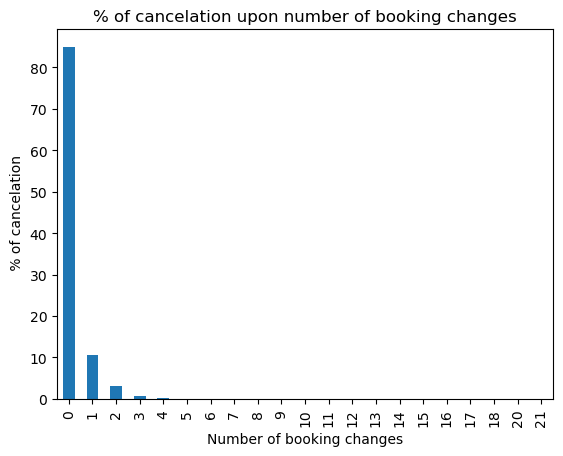

In [36]:
#Cancelation correalation with number of Booking changes
book_resort=hotel.groupby('booking_changes').count()['is_canceled']*100/len(hotel)
book_resort.plot(kind='bar')
plt.xlabel('Number of booking changes')
plt.ylabel(' % of cancelation')
plt.title('% of cancelation upon number of booking changes')
plt.show()

#### More the Number of Booking changes more chance is that they will not cancel the reservation

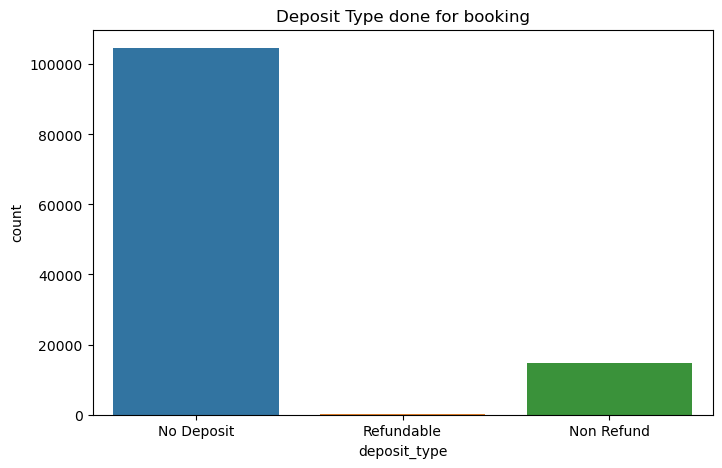

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(data=hotel, x="deposit_type")
plt.title('Deposit Type done for booking')
plt.show()

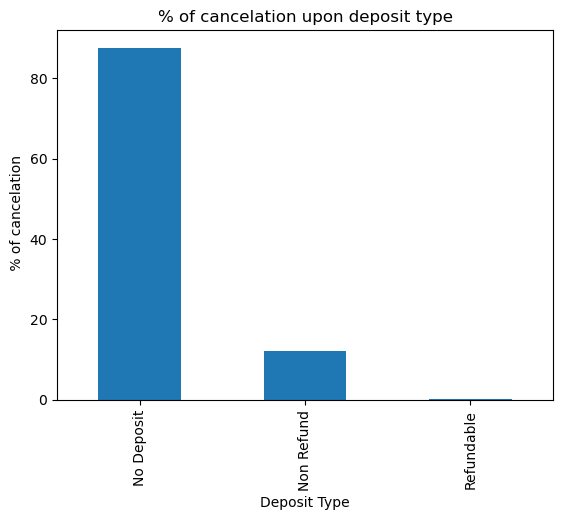

In [38]:
#Correlation of deposit and cancellation
deposit_resort=hotel.groupby('deposit_type').count()['is_canceled']*100/len(hotel)
deposit_resort.plot(kind='bar')
plt.xlabel('Deposit Type')
plt.ylabel(' % of cancelation')
plt.title('% of cancelation upon deposit type')
plt.show()

#### No deposit means the customer can tend to cancel the booking.

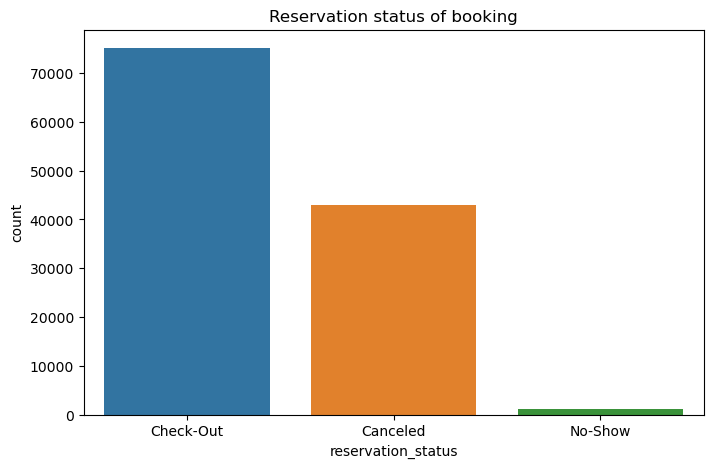

In [39]:
#Reservation status of customer
plt.figure(figsize=(8,5))
sns.countplot(data=hotel, x="reservation_status")
plt.title('Reservation status of booking')
plt.show()

#### There are very rare case in which customer didnt inform hotel about their cancelation they will either checkin on cancel there reservation accordingly. 